In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
  return mean_squared_error(y_true, y_pred, squared=False)


from google.colab import files
uploaded = files.upload()

run = 0

Saving HW2Dataset.csv to HW2Dataset (3).csv


Read data into pandas dataframe and create train/test split

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['HW2Dataset.csv']))
df = df.sample(frac=1, random_state= 0).reset_index(drop=True) # randomly shuffle the data
n_regresors = 15

column_names = df.columns.values.tolist()
column_names = column_names[1:16]
print(column_names)

## Data Reorganization into numpy array
df2 = df.to_numpy()
y = df2[:,n_regresors+1]
X = df2[:,1:n_regresors+1]




# Create train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

N = y.size
N_train = y_train.size
N_test = y_test.size


Train_Set1 = X_train[:,:5] # Regressors 1 - 5
Train_Set2 = X_train[:,:10] # Regressors 1 - 10

Test_Set1 = X_test[:,:5] # Regressors 1 - 5
Test_Set2 = X_test[:,:10] # Regressors 1 - 10




['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15']


Ordinary Linear Regression on all regressors

In [ ]:
## Problem 1 - OLR

# Import Libraries for Linear Regression
import numpy as np
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib import cm

# Generate Multivariate Linear Regression Fit

def model_train_evaluate(model, name, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, print_out_linear = 0):
  #global X_train, X_test, y_train, y_test
  model.fit(X_train,y_train)
  

  # Training Error
  y_pred_train = model.predict(X_train)
  RMSE_train = RMSE(y_train, y_pred_train)

  # Cross Validation Error (Average across error from each fold)
  RMSE_CV = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
  RMSE_CV = -np.mean(RMSE_CV)

  # Test Error
  y_pred_test = model.predict(X_test)
  RMSE_Test = RMSE(y_test, y_pred_test)

  if print_out_linear == 1:
    w0 = model.intercept_
    wn = model.coef_

    plt.figure(figsize=(8,6))
    plt.bar(height=np.abs(wn), x=column_names, width=0.8)
    plt.xticks(fontsize=10 )
    plt.title("Feature importances via coefficients : {}".format(name))
    plt.xlabel("Feature")
    plt.ylabel("Feature Weight \n(Absolute Value)")
    plt.show()

    print(' ')
    print('Results for ', name)
    print('* Model coefficients ', name, ' :')
    print('  w0:',model.intercept_)
    print('  wn:',model.coef_)

    print(' ')
    print('* Root Mean square error of ', name, ' model - Training Error         :', RMSE_train)
    print('* Root Mean square error of ', name, ' model - Cross Validation Error :', RMSE_CV)
    print('* Root Mean square error of ', name, ' model - Test Error             :', RMSE_Test)
    print('R2 Score = {}'.format(r2_score(y_test, y_pred_test)))
    print(' ')
    print(' ')

  return RMSE_train, RMSE_CV, RMSE_Test



Ridge CV Sensitivity Study

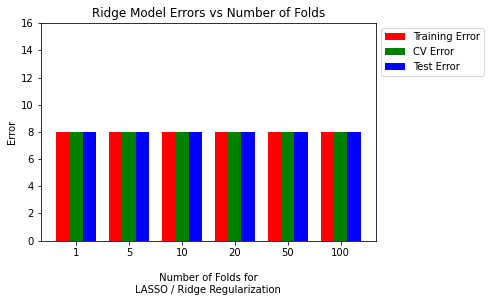

In [ ]:
cv = [5, 10, 20, 50, 100]
models = []
for i in cv:
  models.append(RidgeCV(cv = i))
models.append(RidgeCV())

names = []
for i in cv:
  names.append("Ridge \nCV = {}".format(str(i)))
names.append("Ridge \nCV = LOO")

RMSEs = []
for count,ele in enumerate(models):
  RMSEs.append(list(model_train_evaluate(ele, names[count])))

cv.insert(0,1)

Train_Error = [item[0] for item in RMSEs]
CV_Error = [item[1] for item in RMSEs]
Test_Error = [item[2] for item in RMSEs]




c = len(cv)
ind = np.arange(c) 
width = 0.25
  
xvals = Train_Error
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = CV_Error
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = Test_Error
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("\n Number of Folds for \nLASSO / Ridge Regularization")
plt.ylabel('Error')
plt.title("Ridge Model Errors vs Number of Folds")
  
plt.xticks(ind+width, cv)
plt.ylim(0,16)
plt.legend( (bar1, bar2, bar3), ('Training Error', 'CV Error', 'Test Error'), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()





LASSO CV Sensitivity Study

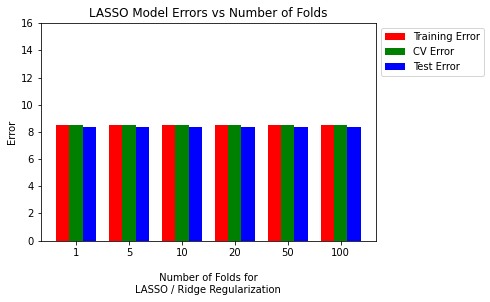

In [ ]:
cv = [5, 10, 20, 50, 100]
models = []
for i in cv:
  models.append(LassoCV(cv = i))
models.append(LassoCV())

names = []
for i in cv:
  names.append("Lasso \nCV = {}".format(str(i)))
names.append("Lasso \nCV = LOO")

RMSEs = []
for count,ele in enumerate(models):
  RMSEs.append(list(model_train_evaluate(ele, names[count])))

cv.insert(0,1)

Train_Error = [item[0] for item in RMSEs]
CV_Error = [item[1] for item in RMSEs]
Test_Error = [item[2] for item in RMSEs]




c = len(cv)
ind = np.arange(c) 
width = 0.25
  
xvals = Train_Error
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = CV_Error
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = Test_Error
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("\n Number of Folds for \nLASSO / Ridge Regularization")
plt.ylabel('Error')
plt.title("LASSO Model Errors vs Number of Folds")
  
plt.xticks(ind+width, cv)
plt.ylim(0,16)
plt.legend( (bar1, bar2, bar3), ('Training Error', 'CV Error', 'Test Error'), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()


OLS, Ridge and Lasso on Data

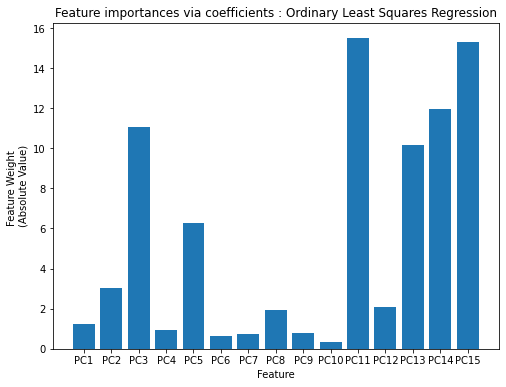

 
Results for  Ordinary Least Squares Regression
* Model coefficients  Ordinary Least Squares Regression  :
  w0: 34.289101236173806
  wn: [ -1.22309359   3.01581793  11.0728872   -0.91740687   6.27325807
  -0.61440494   0.74168602  -1.92024954   0.78879332  -0.31714585
 -15.49260968   2.07622316 -10.16257511 -11.96731486  15.32056053]
 
* Root Mean square error of  Ordinary Least Squares Regression  model - Training Error         : 7.973767912282621
* Root Mean square error of  Ordinary Least Squares Regression  model - Cross Validation Error : 7.992421972391108
* Root Mean square error of  Ordinary Least Squares Regression  model - Test Error             : 7.9810571104866
R2 Score = 0.8809139924750985
 
 


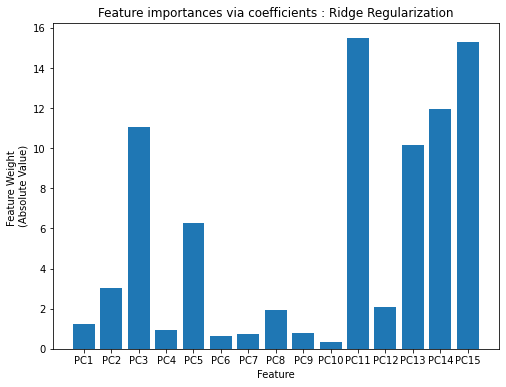

 
Results for  Ridge Regularization
* Model coefficients  Ridge Regularization  :
  w0: 34.289072848874135
  wn: [ -1.22308997   3.01579776  11.0726868   -0.91740343   6.27294645
  -0.61452831   0.74157022  -1.91993971   0.78871673  -0.31760559
 -15.48800831   2.07667187 -10.1597103  -11.952392    15.29744186]
 
* Root Mean square error of  Ridge Regularization  model - Training Error         : 7.9737685526465025
* Root Mean square error of  Ridge Regularization  model - Cross Validation Error : 7.992416229683213
* Root Mean square error of  Ridge Regularization  model - Test Error             : 7.980906173521988
R2 Score = 0.8809184967181553
 
 


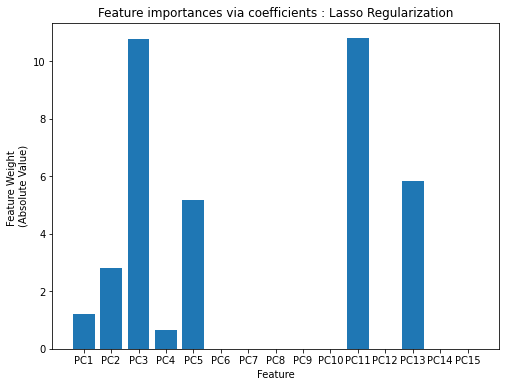

 
Results for  Lasso Regularization
* Model coefficients  Lasso Regularization  :
  w0: 34.28281571757762
  wn: [ -1.21935207   2.82646957  10.78838479  -0.67091936   5.17442439
  -0.           0.          -0.           0.          -0.
 -10.80833099   0.          -5.8266595   -0.           0.        ]
 
* Root Mean square error of  Lasso Regularization  model - Training Error         : 8.474416930743624
* Root Mean square error of  Lasso Regularization  model - Cross Validation Error : 8.486280804882455
* Root Mean square error of  Lasso Regularization  model - Test Error             : 8.372441694425145
R2 Score = 0.8689478464781139
 
 


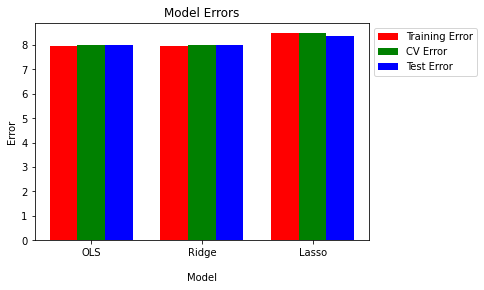

In [ ]:
model = LinearRegression()
RMSE_OLS = model_train_evaluate(model, 'Ordinary Least Squares Regression',  print_out_linear = 1)

model = sklearn.linear_model.RidgeCV(cv = 5)
RMSE_Ridge_CV5 = model_train_evaluate(model, 'Ridge Regularization',  print_out_linear = 1)

model = sklearn.linear_model.LassoCV(cv = 5)
RMSE_Lasso_CV5 = model_train_evaluate(model, 'Lasso Regularization',  print_out_linear = 1)

ii = 0
Train_Error = [RMSE_OLS[ii] , RMSE_Ridge_CV5[ii], RMSE_Lasso_CV5[ii]]
ii = 1
CV_Error = [RMSE_OLS[ii] , RMSE_Ridge_CV5[ii], RMSE_Lasso_CV5[ii]]
ii = 2
Test_Error = [RMSE_OLS[ii] , RMSE_Ridge_CV5[ii], RMSE_Lasso_CV5[ii]]




model_names = ['OLS','Ridge', 'Lasso']
  
c = len(model_names)
ind = np.arange(c) 
width = 0.25
  
xvals = Train_Error
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = CV_Error
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = Test_Error
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("\nModel")
plt.ylabel('Error')
plt.title("Model Errors")
  
plt.xticks(ind+width, model_names)
plt.legend( (bar1, bar2, bar3), ('Training Error', 'CV Error', 'Test Error'), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()



Evaluating changing the number of regressors

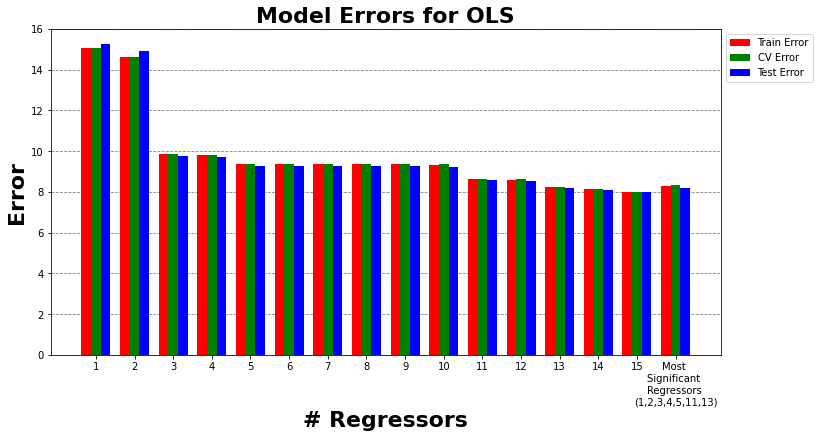

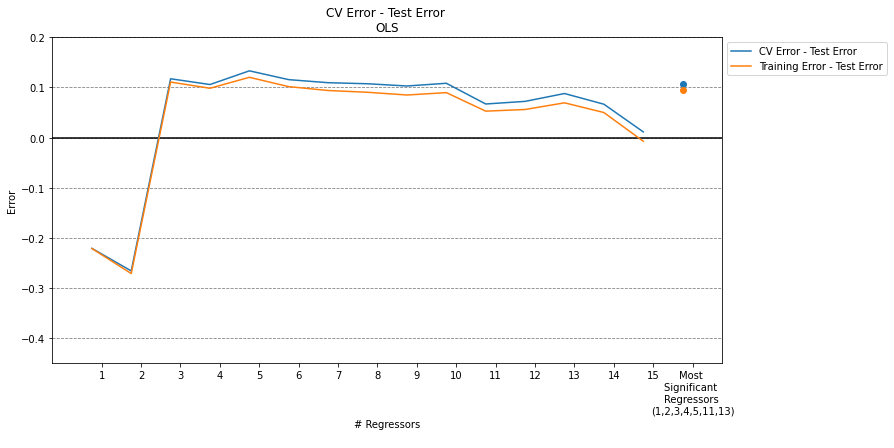

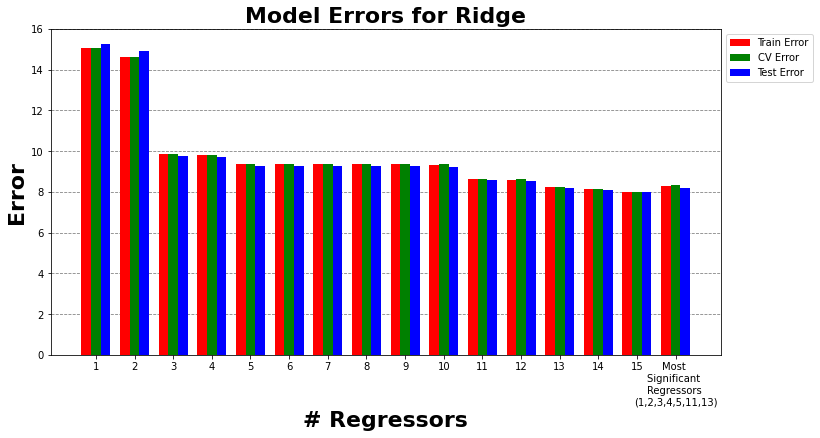

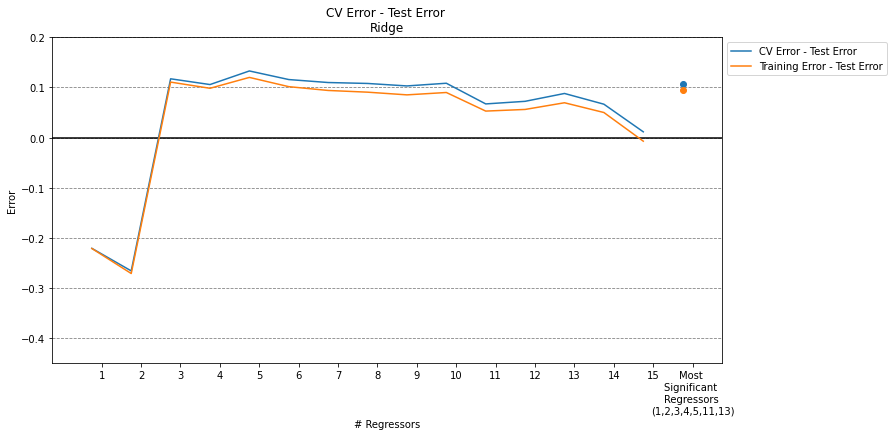

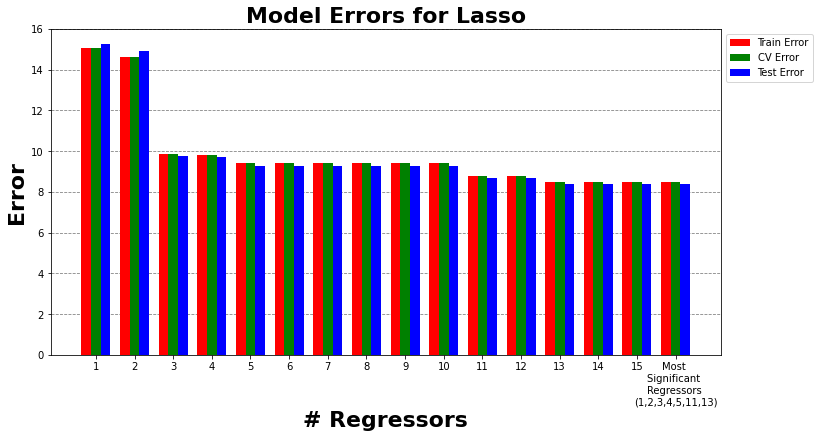

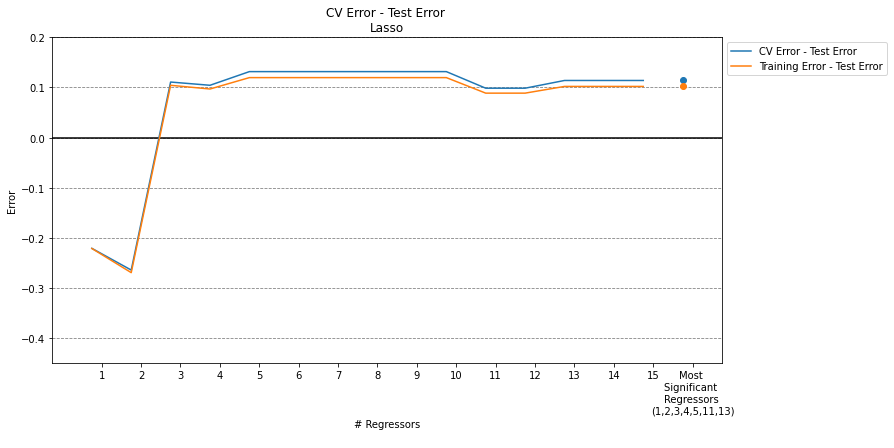

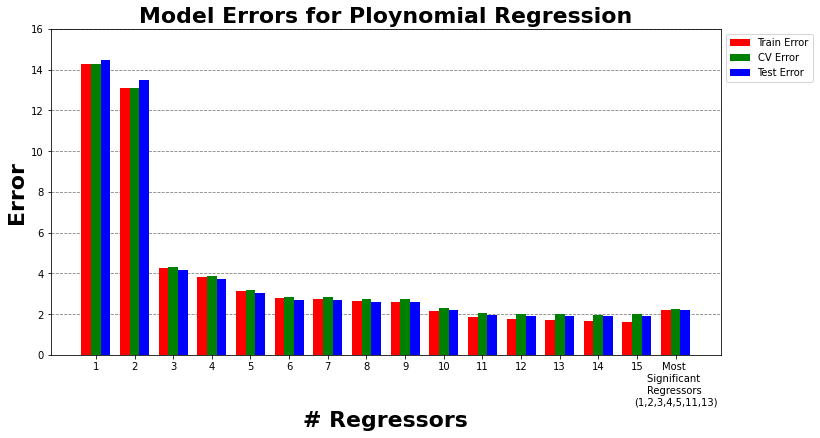

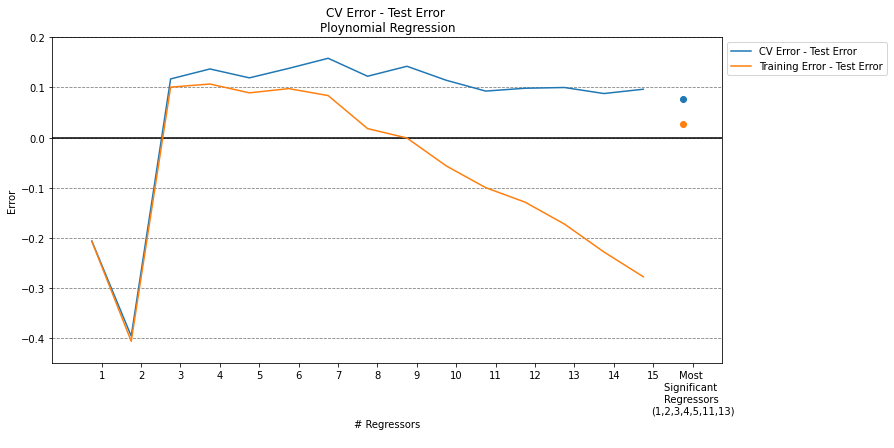

 Ideal number of Regressors for OLS is 15 : R^2 = 0.8809139924750985
 Ideal number of Regressors for Ridge is 15 : R^2 = 0.8809184967181553
 Ideal number of Regressors for Lasso is 13 : R^2 = 0.8689478464781139
 Ideal number of Regressors for Ploynomial Regression is 15 : R^2 = 0.9933141034185045
* Model coefficients :
{'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=3)), ('linearregression', LinearRegression())], 'verbose': False, 'polynomialfeatures': PolynomialFeatures(degree=3), 'linearregression': LinearRegression(), 'polynomialfeatures__degree': 3, 'polynomialfeatures__include_bias': True, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'C', 'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': None, 'linearregression__normalize': 'deprecated', 'linearregression__positive': False}


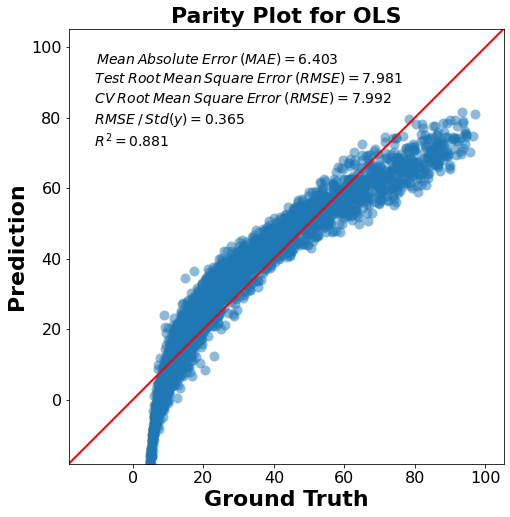

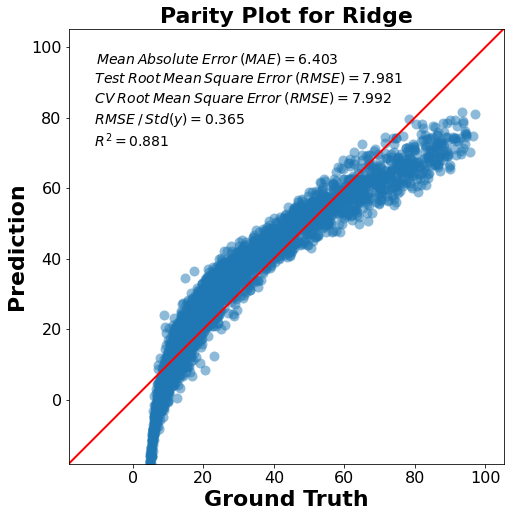

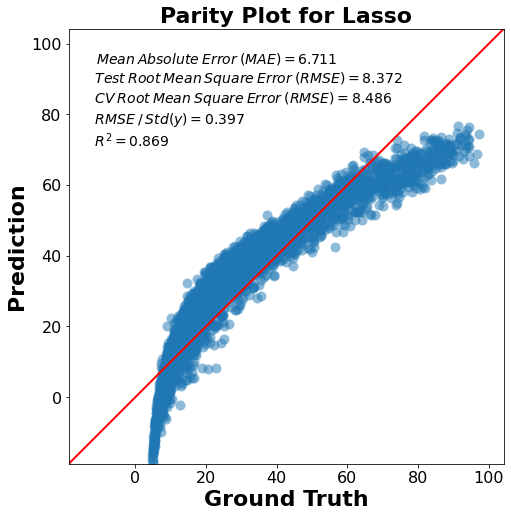

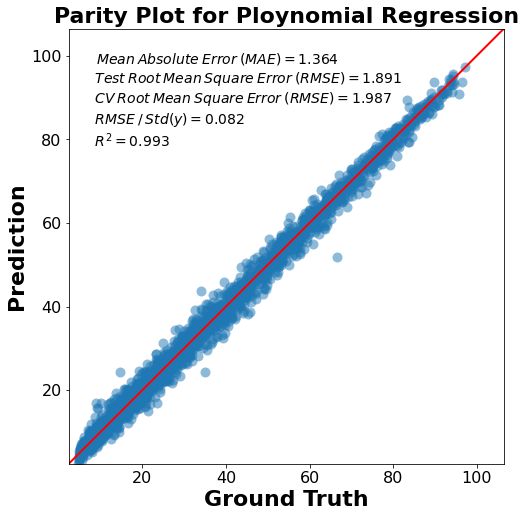

In [ ]:
Train_Sets = []
Test_Sets = []

Regressor_Set_names = []

for q in range (n_regresors):
  Train_Sets.append(X_train[:,:q+1])
  Test_Sets.append(X_test[:,:q+1])
  Regressor_Set_names.append('{}'.format(str(q+1)))


Most_Significant_Regressors = [0,1,2,3,4,10,12]
Train_Sets.append(X_train[:,Most_Significant_Regressors])
Test_Sets.append(X_test[:,Most_Significant_Regressors])
Regressor_Set_names.append('Most \nSignificant \nRegressors \n(1,2,3,4,5,11,13)')


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())

models = [LinearRegression(), RidgeCV(cv = 5),    LassoCV(cv = 5),         polyreg         ]
names =  [      'OLS',       'Ridge',   'Lasso',  'Ploynomial Regression']
RMSEs = []
R2_Scores = []

for count, i in enumerate(models):
  temp = []
  R2_Scores_temp = []
  for j, k in zip(Train_Sets, Test_Sets):
    temp.append(list(model_train_evaluate(i, names[count], X_train = j, X_test = k)))
    R2_Scores_temp.append(r2_score(y_test, i.predict(k)))

    
  c = len(temp)
  ind = np.arange(c) 
  width = 0.25
  

  fig, ax = plt.subplots(figsize=(12, 6))
  ax.set_axisbelow(True)
  ax.yaxis.grid(color='gray', linestyle='dashed')


  xvals = [item[0] for item in temp]
  bar1 = ax.bar(ind, xvals, width, color = 'r')
    
  yvals = [item[1] for item in temp]
  bar2 = ax.bar(ind+width, yvals, width, color='g')
    
  zvals = [item[2] for item in temp]
  bar3 = ax.bar(ind+width*2, zvals, width, color = 'b')


  font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 22,
          }
  plt.xlabel("# Regressors", fontdict = font_axis_publish)
  plt.ylabel('Error', fontdict = font_axis_publish)
  plt.title("Model Errors for {}".format(names[count]), fontdict = font_axis_publish)
  plt.ylim([0, 16])
  
  plt.xticks(ind+width, Regressor_Set_names)
  plt.legend( (bar1, bar2, bar3), ('Train Error', 'CV Error', 'Test Error'), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
  plt.show()





  fig, ax = plt.subplots(figsize=(12, 6))
  ax.set_axisbelow(True)
  ax.yaxis.grid(color='gray', linestyle='dashed')


  xvals = [item[0] for item in temp]
  yvals = [item[1] for item in temp]
  zvals = [item[2] for item in temp]
  
  cv_minus_test = []
  train_minus_test = []
  for zvals_, yvals_, xvals_ in zip(zvals, yvals, xvals):
    cv_minus_test.append(yvals_ - zvals_)
    train_minus_test.append(xvals_ - zvals_)

  
  ax.plot(ind[0:15], cv_minus_test[0:15])
  ax.plot(ind[0:15], train_minus_test[0:15])
  ax.scatter(ind[15], cv_minus_test[15])
  ax.scatter(ind[15], train_minus_test[15])
  ax.hlines(0, -1, 17, colors='k')

  plt.xlabel("# Regressors\n")
  plt.ylabel('Error')
  plt.title("CV Error - Test Error \n{}".format(names[count]))
  plt.xlim([ind[0]-1, ind[-1]+1])
  plt.ylim([-.45, .2])
  
  plt.xticks(ind+width, Regressor_Set_names)
  plt.legend(('CV Error - Test Error', 'Training Error - Test Error'), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
  plt.show()

  RMSEs.append(temp)
  R2_Scores.append(R2_Scores_temp)



Best_Models = []
#print(R2_Scores)
for i in R2_Scores:
  max_value = max(i)
  max_index = i.index(max_value)
  Best_Models.append([max_index, max_value])

for count, i in enumerate(Best_Models):
  print(' Ideal number of Regressors for {} is {} : R^2 = {}'.format(names[count], Regressor_Set_names[i[0]], i[1]))





# Parity Plots

def partity_plot(x, y, count, RMSE_CV):
  # Font for figure for publishing
  global names
  font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 22,
          }
  plt.rcParams['ytick.labelsize'] = 16
  plt.rcParams['xtick.labelsize'] = 16

  # Plot Figures
  fignow = plt.figure(figsize=(8,8))

  ## find the boundaries of X and Y values
  bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

  # Reset the limits
  ax = plt.gca()
  ax.set_xlim(bounds)
  ax.set_ylim(bounds)
  # Ensure the aspect ratio is square
  ax.set_aspect("equal", adjustable="box")

  plt.plot(x,y,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)

  ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

  # Calculate Statistics of the Parity Plot 
  mean_abs_err = np.mean(np.abs(x-y))
  rmse = np.sqrt(np.mean((x-y)**2))
  rmse_std = rmse / np.std(y)
  z = np.polyfit(x,y, 1)
  y_hat = np.poly1d(z)(x)

  text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Test \: Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ CV \: Root \: Mean \: Square \: Error \: (RMSE) = {RMSE_CV:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y,y_hat):0.3f}$"

  plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
      fontsize=14, verticalalignment='top')

  # Title and labels 
  plt.title("Parity Plot for {}".format(names[count]), fontdict=font_axis_publish)
  plt.xlabel('Ground Truth', fontdict=font_axis_publish)
  plt.ylabel('Prediction', fontdict=font_axis_publish)


for count, i in enumerate(Best_Models):
  model = models[count]
  model_train_evaluate(model, names[count], X_train = Train_Sets[i[0]], X_test = Test_Sets[i[0]])
  RMSE_CV = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
  RMSE_CV = -np.mean(RMSE_CV)
  partity_plot(y_test, model.predict(Test_Sets[i[0]]), count, RMSE_CV )
  



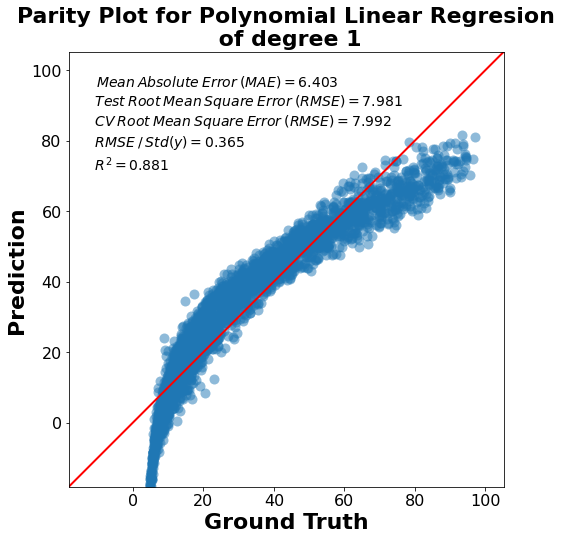

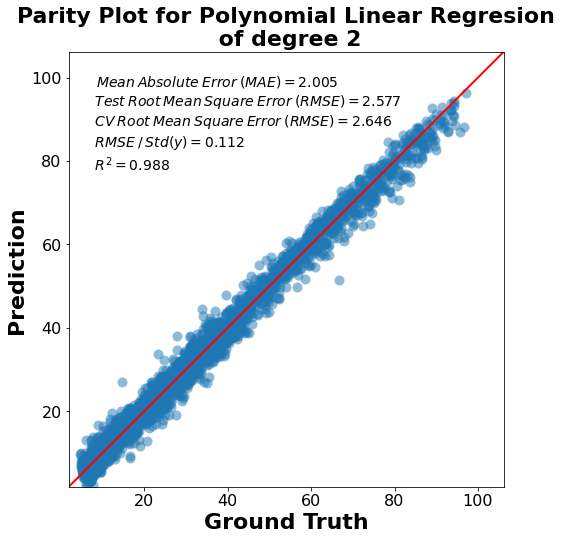

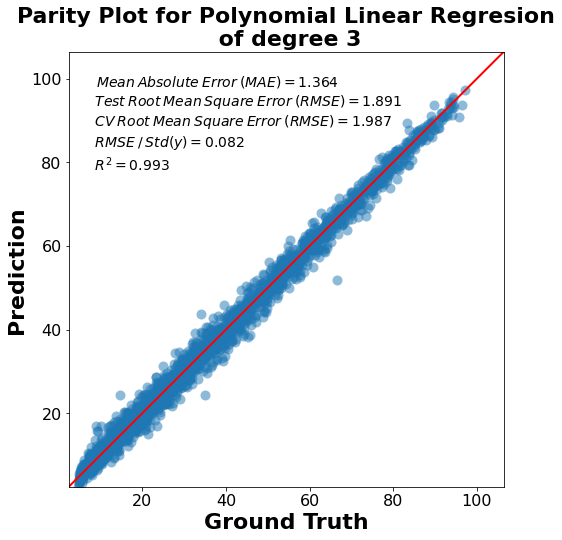

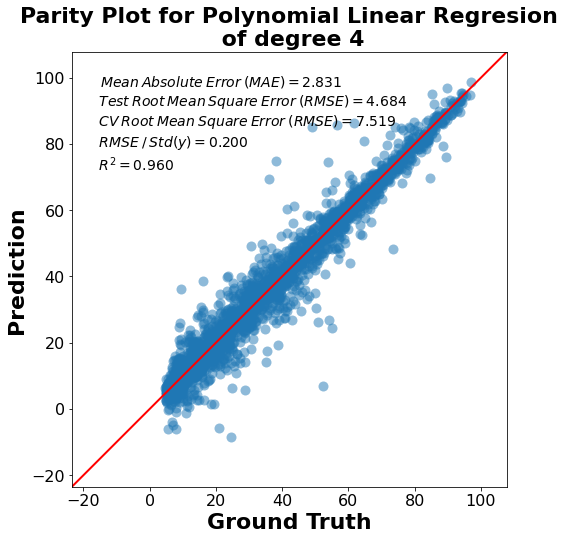

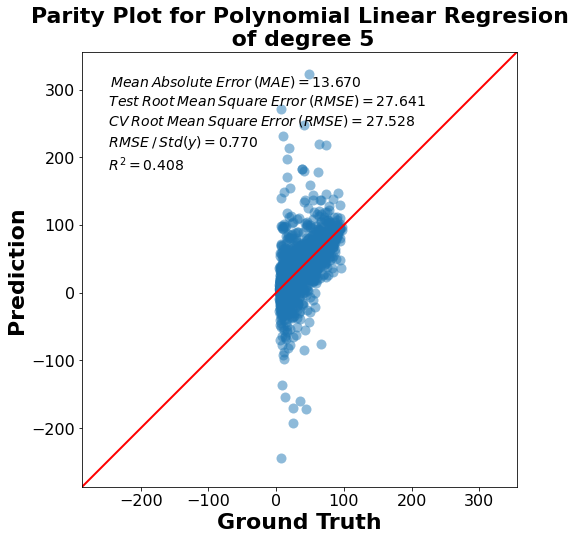

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


degrees = np.arange(1,6)

# Parity Plots

def partity_plot(x, y, degree, RMSE_CV):
  # Font for figure for publishing
  global names
  font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 22,
          }
  plt.rcParams['ytick.labelsize'] = 16
  plt.rcParams['xtick.labelsize'] = 16

  # Plot Figures
  fignow = plt.figure(figsize=(8,8))

  ## find the boundaries of X and Y values
  bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

  # Reset the limits
  ax = plt.gca()
  ax.set_xlim(bounds)
  ax.set_ylim(bounds)
  # Ensure the aspect ratio is square
  ax.set_aspect("equal", adjustable="box")

  plt.plot(x,y,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)

  ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

  # Calculate Statistics of the Parity Plot 
  mean_abs_err = np.mean(np.abs(x-y))
  rmse = np.sqrt(np.mean((x-y)**2))
  rmse_std = rmse / np.std(y)
  z = np.polyfit(x,y, 1)
  y_hat = np.poly1d(z)(x)

  text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Test \: Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ CV \: Root \: Mean \: Square \: Error \: (RMSE) = {RMSE_CV:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y,y_hat):0.3f}$"

  plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
      fontsize=14, verticalalignment='top')

  # Title and labels 
  plt.title("Parity Plot for Polynomial Linear Regresion\n of degree {}".format(degree), fontdict=font_axis_publish)
  plt.xlabel('Ground Truth', fontdict=font_axis_publish)
  plt.ylabel('Prediction', fontdict=font_axis_publish)
  plt.show()


for degree in degrees:
  polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
  polyreg.fit(X_train,y_train)
  y_pred_test = polyreg.predict(X_test)
  RMSE_CV = cross_val_score(polyreg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
  RMSE_CV = -np.mean(RMSE_CV)
  partity_plot(y_test, y_pred_test, degree, RMSE_CV)



In [ ]:
## Problem 2

import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF,
    WhiteKernel,
    ExpSineSquared
)
import matplotlib.pyplot as plt
from matplotlib import cm



Kernels and their Parameters: RBF(length_scale=[26.4, 2.01, 2.41, 23.7, 1.51, 7.61, 33, 3.48, 9.76, 3.93, 1.85, 2.33, 4.39, 1.82, 3.43]) + WhiteKernel(noise_level=0.0048)
GPR_score =  0.9934204019682028
Kernels and their Parameters: RBF(length_scale=[26.5, 1.85, 2.49, 29.8, 1.39, 6.63, 30.3, 3.18, 21, 3.61, 1.87, 2.79, 4.3, 2.79, 3.41]) + WhiteKernel(noise_level=0.00509)
GPR_score =  0.9938504499934386
Kernels and their Parameters: RBF(length_scale=[25.9, 1.85, 2.26, 37.7, 1.33, 5.53, 20.3, 3.38, 12.8, 3.13, 1.92, 2.55, 3.79, 3.17, 2.54]) + WhiteKernel(noise_level=0.00494)
GPR_score =  0.9940398244557848
Kernels and their Parameters: RBF(length_scale=[25.6, 1.72, 2.43, 39.4, 1.29, 5.86, 30.5, 3.11, 14.3, 3.27, 1.96, 2.3, 3.68, 2.99, 2.65]) + WhiteKernel(noise_level=0.00501)
GPR_score =  0.9942564361300571


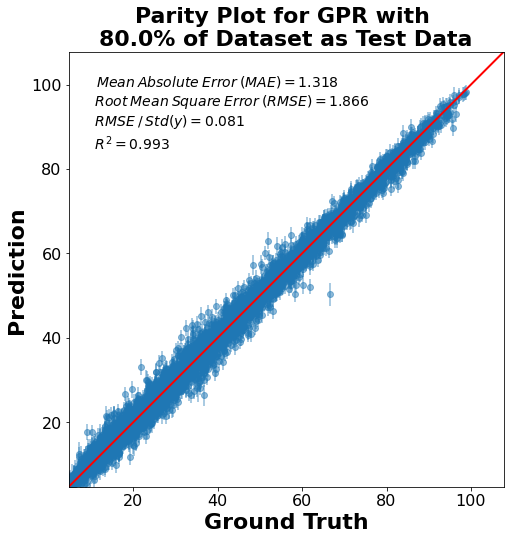

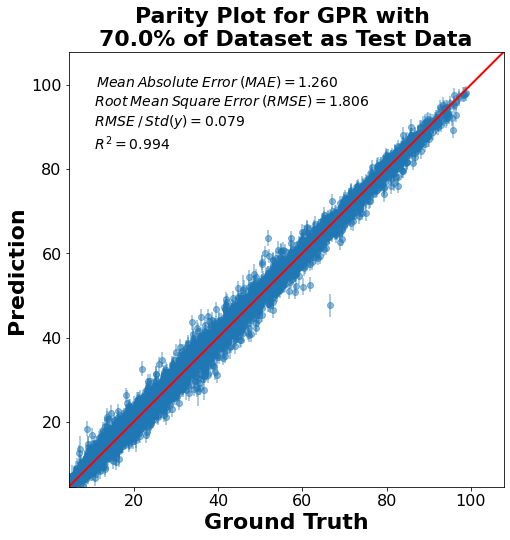

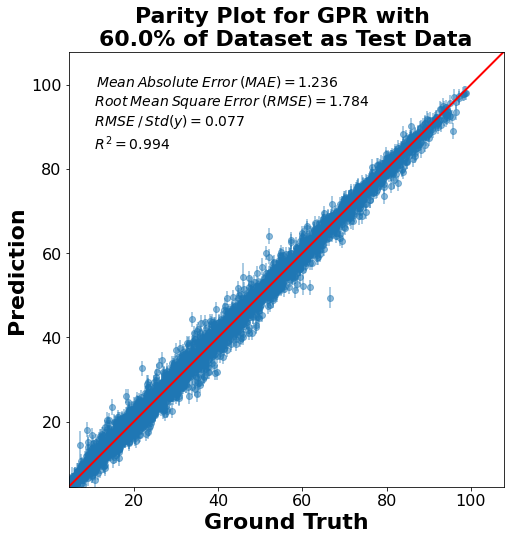

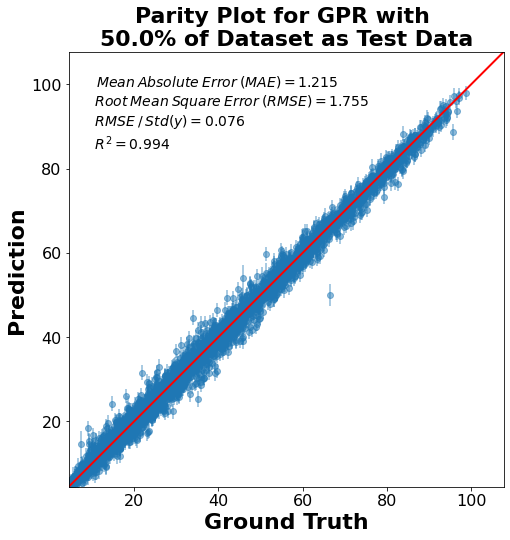

In [ ]:

# Baselining with Sklearn's LinearRegressor

from sklearn.linear_model import LinearRegression


def partity_plot_GPR(x, y_pred, error, test_split):
  # Font for figure for publishing
  font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 22,
          }
  plt.rcParams['ytick.labelsize'] = 16
  plt.rcParams['xtick.labelsize'] = 16

  # Plot Figures
  fignow = plt.figure(figsize=(8,8))

  ## find the boundaries of X and Y values
  bounds = (min(x.min(), y_pred.min()) - int(0.1 * y_pred.min()), max(x.max(),y_pred.max())+ int(0.1 * y_pred.max()))

  # Reset the limits
  ax = plt.gca()
  ax.set_xlim(bounds)
  ax.set_ylim(bounds)
  # Ensure the aspect ratio is square
  ax.set_aspect("equal", adjustable="box")

  plt.scatter(x,y_pred, alpha=0.5 )
  plt.errorbar(x,y_pred, yerr = error, linestyle="None", fmt='', alpha=0.5 ,ms=10, markeredgewidth=0.0)

  ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

  # Calculate Statistics of the Parity Plot 
  mean_abs_err = np.mean(np.abs(x-y_pred))
  rmse = np.sqrt(np.mean((x-y_pred)**2))
  rmse_std = rmse / np.std(y_pred)
  z = np.polyfit(x,y_pred, 1)
  y_hat = np.poly1d(z)(x)

  text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y_pred,y_hat):0.3f}$"

  plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
      fontsize=14, verticalalignment='top')

  # Title and labels 
  plt.title("Parity Plot for GPR with \n{}% of Dataset as Test Data".format(test_split), fontdict=font_axis_publish)
  plt.xlabel('Ground Truth', fontdict=font_axis_publish)
  plt.ylabel('Prediction', fontdict=font_axis_publish)




Testing_Split = np.array([.8, .7, .6, .5])


for i in Testing_Split:
  # Create train and test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)



  # Construction of Sklearn's Regression and Selection of the Kernel
  kernel = RBF(length_scale = np.ones(15,)) + WhiteKernel()#, length_scale_bounds="fixed")
  gp_regressor = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True, )
  gp_regressor.fit(X_train, y_train)
  name = 'GPR'
  print(f"Kernels and their Parameters: {gp_regressor.kernel_}")

  
  y_pred_mean, y_pred_std = gp_regressor.predict(X_test, return_std=True)
  GPR_score = gp_regressor.score(X_test, y_test)
  print('GPR_score = ', GPR_score)
  q = i*100
  partity_plot_GPR(y_test, y_pred_mean, y_pred_std, str(q))



Testing Different Number of Regressors on 20% of the data as training data

Kernels and their Parameters: RBF(length_scale=[25.7, 1.34, 1.33, 2.7, 1.37]) + WhiteKernel(noise_level=0.0106)
GPR_score =  0.9876888759687552
Kernels and their Parameters: RBF(length_scale=[27.3, 2.1, 1.77, 3, 1.39, 2.9, 25.7, 1.58, 12.6, 1.68]) + WhiteKernel(noise_level=0.00666)
GPR_score =  0.9902892291558602
Kernels and their Parameters: RBF(length_scale=[26.4, 2.01, 2.41, 23.7, 1.51, 7.61, 33, 3.48, 9.76, 3.93, 1.85, 2.33, 4.39, 1.82, 3.43]) + WhiteKernel(noise_level=0.0048)
GPR_score =  0.9934204019682028


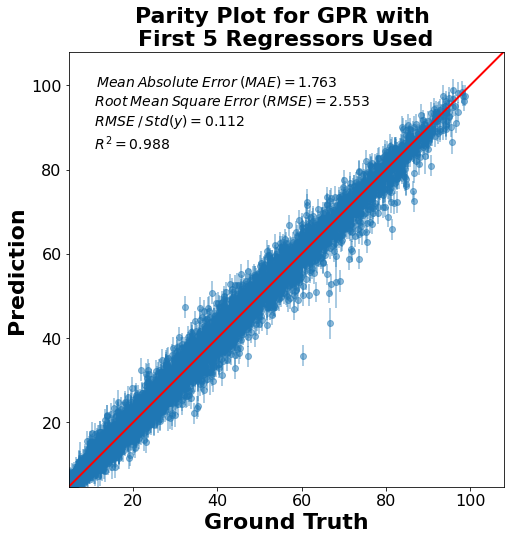

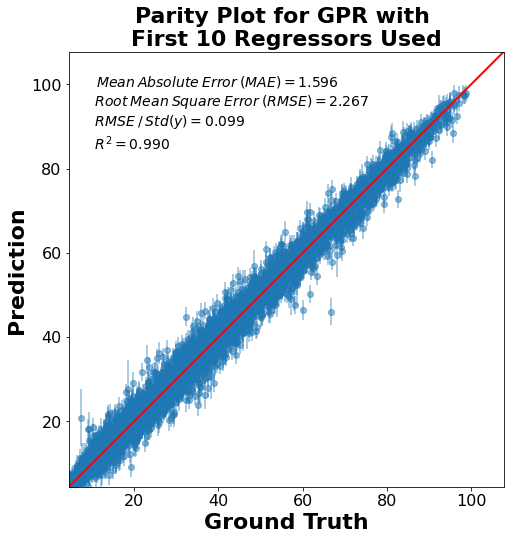

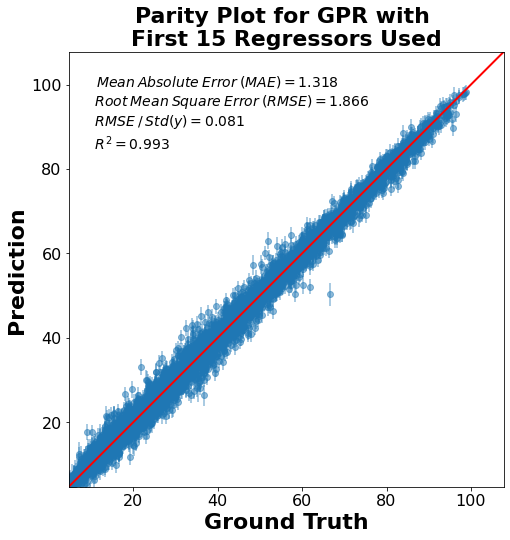

In [ ]:
# Baselining with Sklearn's LinearRegressor

from sklearn.linear_model import LinearRegression


def partity_plot_GPR(x, y_pred, error, num_reg):
  # Font for figure for publishing
  font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 22,
          }
  plt.rcParams['ytick.labelsize'] = 16
  plt.rcParams['xtick.labelsize'] = 16

  # Plot Figures
  fignow = plt.figure(figsize=(8,8))

  ## find the boundaries of X and Y values
  bounds = (min(x.min(), y_pred.min()) - int(0.1 * y_pred.min()), max(x.max(),y_pred.max())+ int(0.1 * y_pred.max()))

  # Reset the limits
  ax = plt.gca()
  ax.set_xlim(bounds)
  ax.set_ylim(bounds)
  # Ensure the aspect ratio is square
  ax.set_aspect("equal", adjustable="box")

  plt.scatter(x,y_pred, alpha=0.5 )
  plt.errorbar(x,y_pred, yerr = error, linestyle="None", fmt='', alpha=0.5 ,ms=10, markeredgewidth=0.0)

  ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

  # Calculate Statistics of the Parity Plot 
  mean_abs_err = np.mean(np.abs(x-y_pred))
  rmse = np.sqrt(np.mean((x-y_pred)**2))
  rmse_std = rmse / np.std(y_pred)
  z = np.polyfit(x,y_pred, 1)
  y_hat = np.poly1d(z)(x)

  text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y_pred,y_hat):0.3f}$"

  plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
      fontsize=14, verticalalignment='top')

  # Title and labels 
  plt.title("Parity Plot for GPR with \nFirst {} Regressors Used".format(num_reg), fontdict=font_axis_publish)
  plt.xlabel('Ground Truth', fontdict=font_axis_publish)
  plt.ylabel('Prediction', fontdict=font_axis_publish)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

Train_Set1 = X_train[:,:5] # Regressors 1 - 5
Train_Set2 = X_train[:,:10] # Regressors 1 - 10

Test_Set1 = X_test[:,:5] # Regressors 1 - 5
Test_Set2 = X_test[:,:10] # Regressors 1 - 10

Train_Sets = [Train_Set1, Train_Set2, X_train]
Test_Sets = [Test_Set1, Test_Set2, X_test]



for i,j in zip(Train_Sets, Test_Sets):
  # Create train and test split

  num_reg = np.size(i, axis = 1)
  # Construction of Sklearn's Regression and Selection of the Kernel
  kernel = RBF(length_scale = np.ones(num_reg,)) + WhiteKernel()#, length_scale_bounds="fixed")
  gp_regressor = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True, )
  gp_regressor.fit(i, y_train)
  name = 'GPR'
  print(f"Kernels and their Parameters: {gp_regressor.kernel_}")

  y_pred_mean, y_pred_std = gp_regressor.predict(j, return_std=True)
  GPR_score = gp_regressor.score(j, y_test)
  print('GPR_score = ', GPR_score)
  partity_plot_GPR(y_test, y_pred_mean, y_pred_std, num_reg)


Kernels and their Parameters: RBF(length_scale=2.15)
Kernels and their Parameters: RBF(length_scale=[10.3, 0.795, 2.18, 3.71, 1.02, 3.31, 8.43, 2.35, 2.65, 0.898, 1.05, 1.43, 1.1, 0.544, 0.489])
Kernels and their Parameters: RBF(length_scale=4.38) + WhiteKernel(noise_level=0.00593)
Kernels and their Parameters: RBF(length_scale=[26.4, 2.01, 2.41, 23.7, 1.51, 7.61, 33, 3.48, 9.76, 3.93, 1.85, 2.33, 4.39, 1.82, 3.43]) + WhiteKernel(noise_level=0.0048)
Kernels and their Parameters: WhiteKernel(noise_level=1)
Kernels and their Parameters: RBF(length_scale=20.2) + RBF(length_scale=[42.2, 2.08, 2.25, 14.8, 1.48, 6.8, 27.9, 2.82, 9.72, 3.14, 1.67, 2.27, 4.29, 1.73, 3.74]) + WhiteKernel(noise_level=0.00472)


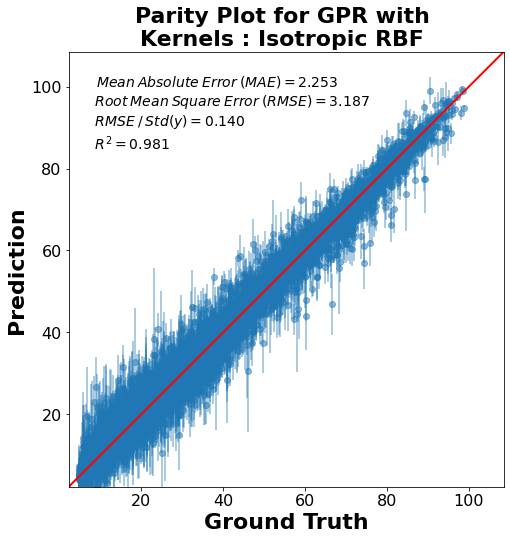

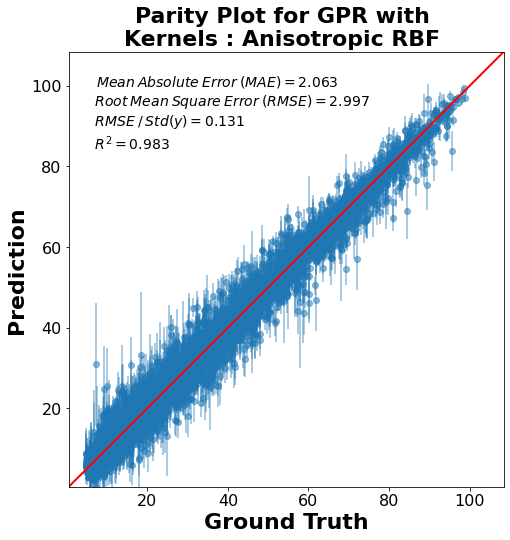

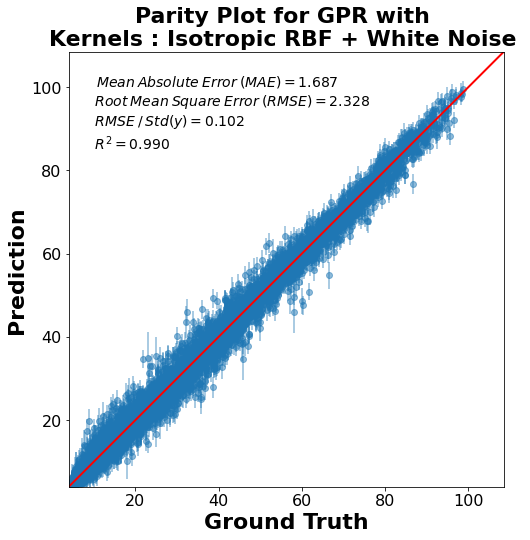

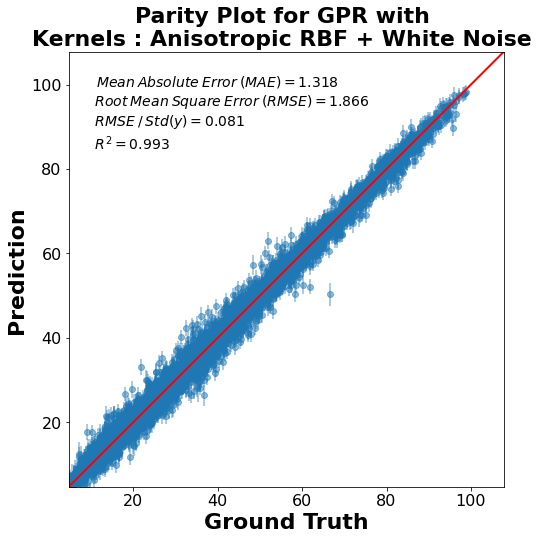

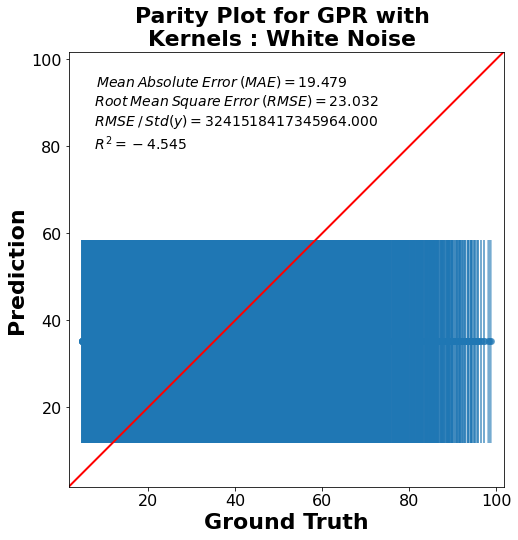

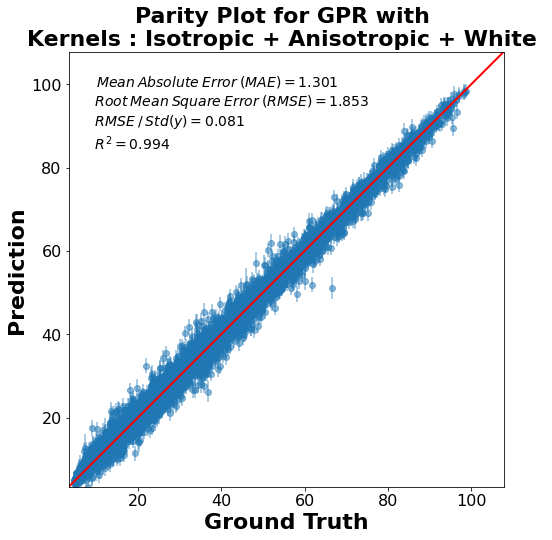

In [ ]:
#Testing Different Kernels

from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import RationalQuadratic


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

kernel_names = ['Isotropic RBF', 'Anisotropic RBF', 'Isotropic RBF + White Noise', 'Anisotropic RBF + White Noise', 'White Noise', 'Isotropic + Anisotropic + White']
kernels =  [RBF(), RBF(length_scale = np.ones(15,)), RBF() + WhiteKernel(), RBF(length_scale = np.ones(15,)) + WhiteKernel(),  WhiteKernel(), RBF() + RBF(length_scale = np.ones(15,)) + WhiteKernel()]



def partity_plot_GPR(x, y_pred, error, kernels):
  # Font for figure for publishing
  font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 22,
          }
  plt.rcParams['ytick.labelsize'] = 16
  plt.rcParams['xtick.labelsize'] = 16

  # Plot Figures
  fignow = plt.figure(figsize=(8,8))

  ## find the boundaries of X and Y values
  bounds = (min(x.min(), y_pred.min()) - int(0.1 * y_pred.min()), max(x.max(),y_pred.max())+ int(0.1 * y_pred.max()))

  # Reset the limits
  ax = plt.gca()
  ax.set_xlim(bounds)
  ax.set_ylim(bounds)
  # Ensure the aspect ratio is square
  ax.set_aspect("equal", adjustable="box")

  plt.scatter(x,y_pred, alpha=0.5 )
  plt.errorbar(x,y_pred, yerr = error, linestyle="None", fmt='', alpha=0.5 ,ms=10, markeredgewidth=0.0)

  ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

  # Calculate Statistics of the Parity Plot 
  mean_abs_err = np.mean(np.abs(x-y_pred))
  rmse = np.sqrt(np.mean((x-y_pred)**2))
  rmse_std = rmse / np.std(y_pred)
  z = np.polyfit(x,y_pred, 1)
  y_hat = np.poly1d(z)(x)

  text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y_pred,y_hat):0.3f}$"

  plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
      fontsize=14, verticalalignment='top')

  # Title and labels 
  plt.title("Parity Plot for GPR with \nKernels : {} ".format(kernels), fontdict=font_axis_publish)
  plt.xlabel('Ground Truth', fontdict=font_axis_publish)
  plt.ylabel('Prediction', fontdict=font_axis_publish)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)


for i,j in zip(kernels, kernel_names):
  # Create train and test split

  # Construction of Sklearn's Regression and Selection of the Kernel
  gp_regressor = GaussianProcessRegressor(kernel=i, alpha=1e-6, normalize_y=True, )
  gp_regressor.fit(X_train, y_train)
  print(f"Kernels and their Parameters: {gp_regressor.kernel_}")

  y_pred_mean, y_pred_std = gp_regressor.predict(X_test, return_std=True)
  partity_plot_GPR(y_test, y_pred_mean, y_pred_std, j)

  

In [ ]:

# N-restarts optimizer parameter sweep

run = 0
if run == 1:
  kernel_name = 'Isotropic RBF + Anisotropic RBF + White Noise'
  kernel =   RBF() + RBF(length_scale = np.ones(15,)) + WhiteKernel()

  n_restarts_optimizer = np.array([0,1,2,3,4,5])


  for i in n_restarts_optimizer:
    gp_regressor = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True, n_restarts_optimizer=i)
    gp_regressor.fit(X_train, y_train)
    print(f"Kernels and their Parameters: {gp_regressor.kernel_}")

    y_pred_mean, y_pred_std = gp_regressor.predict(X_test, return_std=True)
    partity_plot_GPR(y_test, y_pred_mean, y_pred_std, kernel_name)

Kernels and their Parameters: RBF(length_scale=20.2) + RBF(length_scale=[42.2, 2.08, 2.25, 14.8, 1.48, 6.8, 27.9, 2.82, 9.72, 3.14, 1.67, 2.27, 4.29, 1.73, 3.74]) + WhiteKernel(noise_level=0.00472)


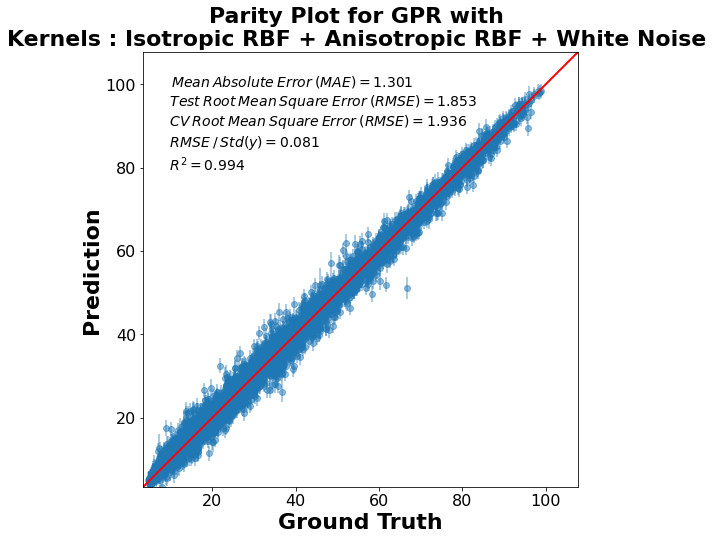

In [ ]:
# Final GPR model with cross validation

def partity_plot_GPR(x, y_pred, error, kernels, RSMECV):
  # Font for figure for publishing
  font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 22,
          }
  plt.rcParams['ytick.labelsize'] = 16
  plt.rcParams['xtick.labelsize'] = 16

  # Plot Figures
  fignow = plt.figure(figsize=(8,8))

  ## find the boundaries of X and Y values
  bounds = (min(x.min(), y_pred.min()) - int(0.1 * y_pred.min()), max(x.max(),y_pred.max())+ int(0.1 * y_pred.max()))

  # Reset the limits
  ax = plt.gca()
  ax.set_xlim(bounds)
  ax.set_ylim(bounds)
  # Ensure the aspect ratio is square
  ax.set_aspect("equal", adjustable="box")

  plt.scatter(x,y_pred, alpha=0.5 )
  plt.errorbar(x,y_pred, yerr = error, linestyle="None", fmt='', alpha=0.5 ,ms=10, markeredgewidth=0.0)

  ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

  # Calculate Statistics of the Parity Plot 
  mean_abs_err = np.mean(np.abs(x-y_pred))
  rmse = np.sqrt(np.mean((x-y_pred)**2))
  rmse_std = rmse / np.std(y_pred)
  z = np.polyfit(x,y_pred, 1)
  y_hat = np.poly1d(z)(x)

  text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Test \: Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ CV \: Root \: Mean \: Square \: Error \: (RMSE) = {RSMECV:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y_pred,y_hat):0.3f}$"

  plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
      fontsize=14, verticalalignment='top')

  # Title and labels 
  plt.title("Parity Plot for GPR with \nKernels : {} ".format(kernels), fontdict=font_axis_publish)
  plt.xlabel('Ground Truth', fontdict=font_axis_publish)
  plt.ylabel('Prediction', fontdict=font_axis_publish)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)


kernel_name = 'Isotropic RBF + Anisotropic RBF + White Noise'
kernel =   RBF() + RBF(length_scale = np.ones(15,)) + WhiteKernel()

gp_regressor = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True, )
gp_regressor.fit(X_train, y_train)
print(f"Kernels and their Parameters: {gp_regressor.kernel_}")

y_pred_mean, y_pred_std = gp_regressor.predict(X_test, return_std=True)



RMSE_CV = cross_val_score(gp_regressor, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
RMSE_CV = -np.mean(RMSE_CV)

partity_plot_GPR(y_test, y_pred_mean, y_pred_std, kernel_name, RMSE_CV)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 16)               33        
 n)                                                              
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 106
Trainable params: 73
Non-trainable params: 33
_________________________________________________________________
{'loss': [34.787384033203125, 34.22648620605469, 33.915306091308594, 33.70333480834961, 33.51579666137695, 33.306724548339844, 32.848785400390625, 31.74113655090332, 30.206518173217773, 28.567302703857422, 26.907169342041016, 25.22933578491211, 23.54165840

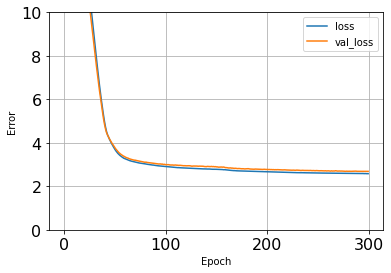

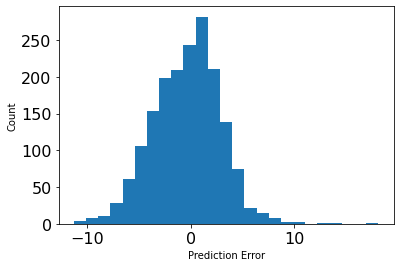

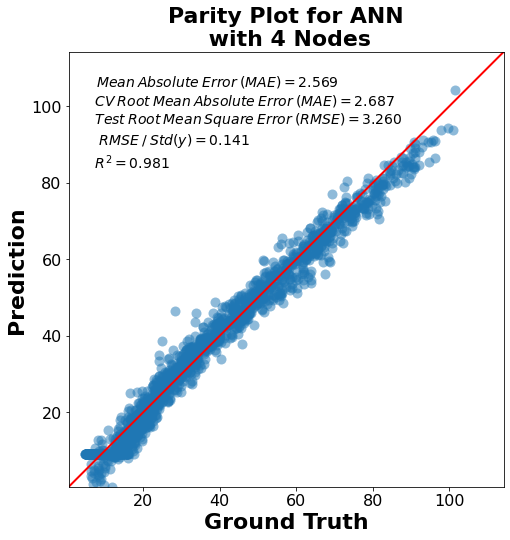

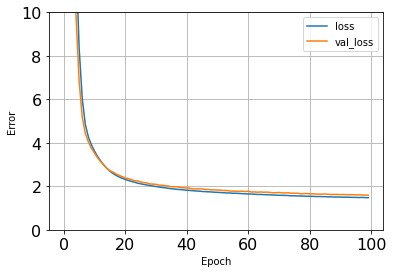

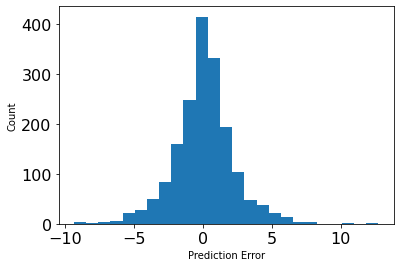

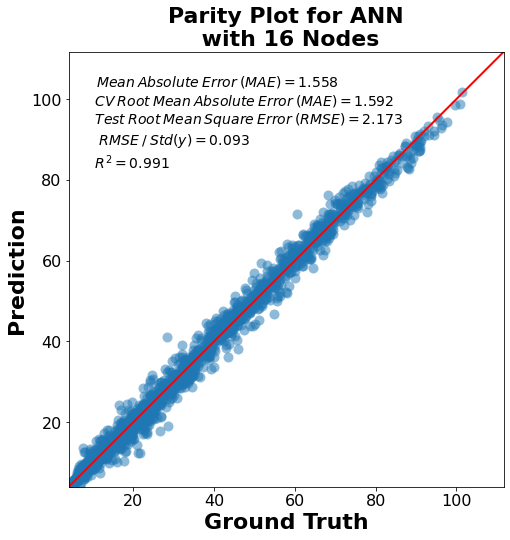

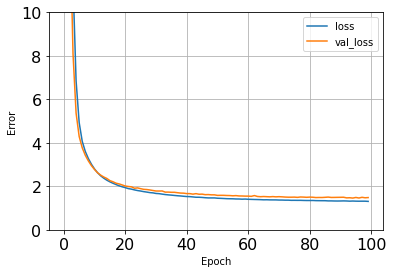

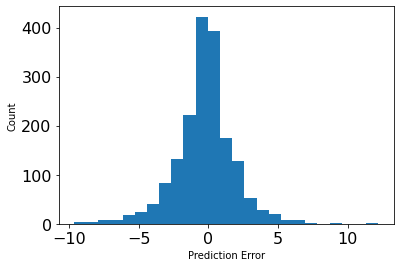

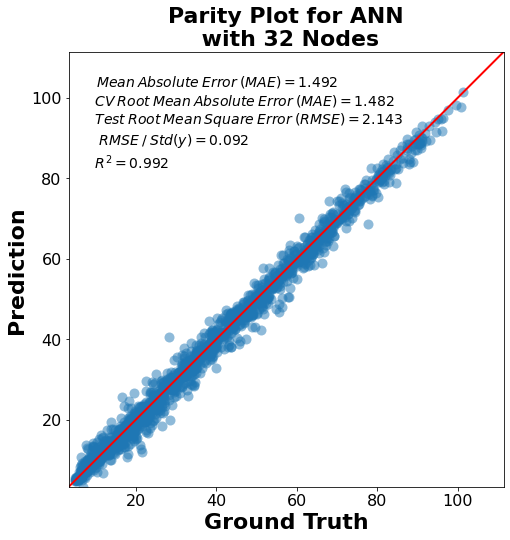

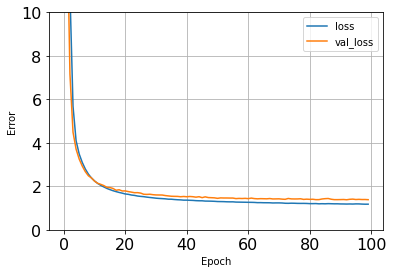

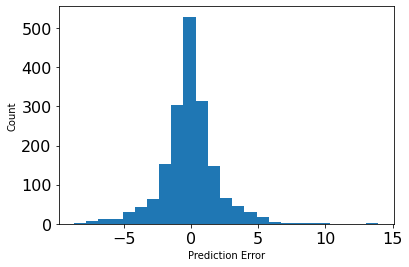

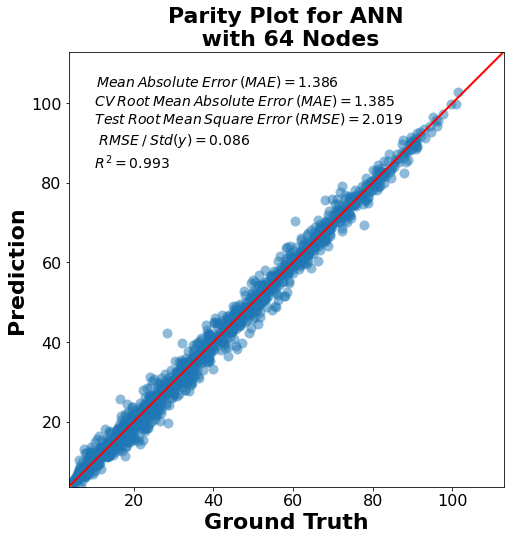

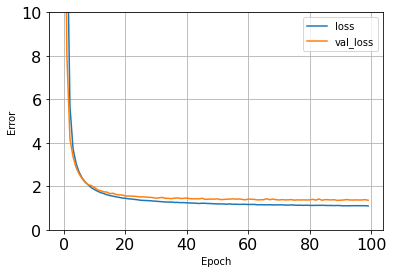

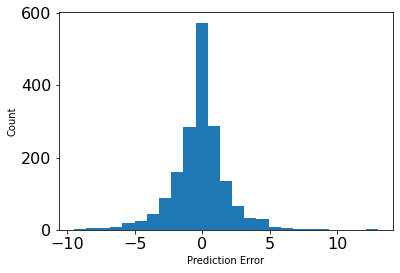

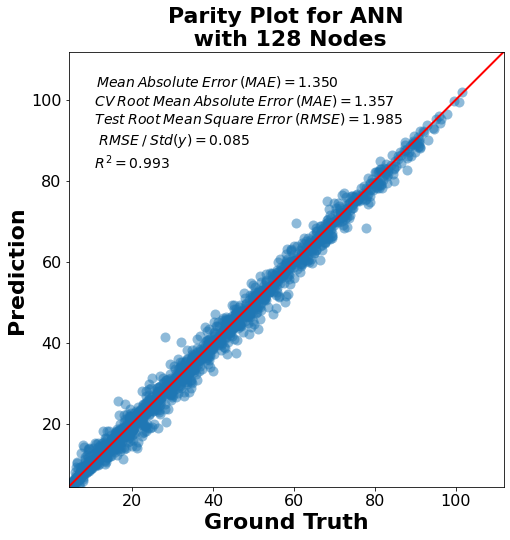

In [ ]:
## Problem 3

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('stiffness_value')
test_labels = test_features.pop('stiffness_value')


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

input_data = np.array(train_features)

input_data_normalizer = layers.Normalization(input_shape=[1,], axis=None)
input_data_normalizer.adapt(input_data)
test_results = {}


def plot_loss(history):
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)




num_nodes = np.array([4, 16, 32, 64, 128])


for i in num_nodes:

  def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(i, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model



  dnn_model = build_and_compile_model(normalizer)
  dnn_model.summary()

  if i == 4:
    epochs = 300
  else:
    epochs = 100

  #time
  history = dnn_model.fit(
      train_features,
      train_labels,
      validation_split=0.2, #5 fold validation
      verbose=0, epochs=epochs)

  print(history.history)
  plot_loss(history)
  CV_MAE = history.history['val_loss'][-1]

  test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


  pd.DataFrame(test_results, index=['Mean absolute error']).T


  test_predictions = dnn_model.predict(test_features).flatten()



  error = test_predictions - test_labels
  plt.figure()
  plt.hist(error, bins=25)
  plt.xlabel('Prediction Error')
  _ = plt.ylabel('Count')



  MSE_ANN = tf.keras.losses.MeanSquaredError()
  print('MSE_ANN = ', MSE_ANN)







  def partity_plot_ANN(x, y_pred,num_nodes, CV_MAE):
    # Font for figure for publishing
    font_axis_publish = {
            'color':  'black',
            'weight': 'bold',
            'size': 22,
            }
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 16

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    ## find the boundaries of X and Y values
    bounds = (min(x.min(), y_pred.min()) - int(0.1 * y_pred.min()), max(x.max(),y_pred.max())+ int(0.1 * y_pred.max()))

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(x,y_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)

    
    ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 
    mean_abs_err = np.mean(np.abs(x-y_pred))
    rmse = np.sqrt(np.mean((x-y_pred)**2))
    rmse_std = rmse / np.std(y_pred)
    z = np.polyfit(x,y_pred, 1)
    y_hat = np.poly1d(z)(x)

    text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ CV \: Root \: Mean \: Absolute \: Error \: (MAE) = {CV_MAE:0.3f}$ \n $ Test \: Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n  $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y_pred,y_hat):0.3f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
        fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title("Parity Plot for ANN\n with {} Nodes".format(num_nodes), fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)

    
  partity_plot_ANN(test_labels, test_predictions, i, CV_MAE)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 16)               33        
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 128)               2176      
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,730
Trainable params: 2,697
Non-trainable params: 33
_________________________________________________________________
{'loss': [24.398977279663086, 6.2505269050598145, 3.3961429595947266, 2.74833083152771, 2.3974838256835938, 2.1616258

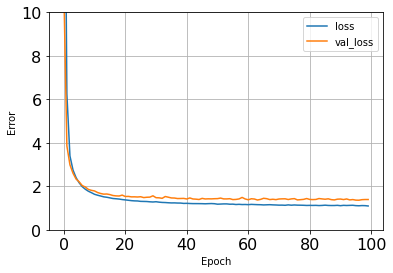

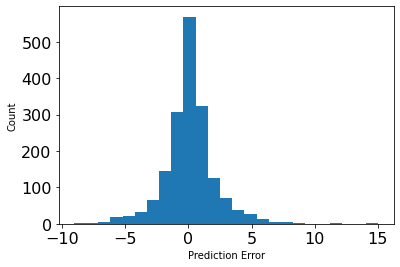

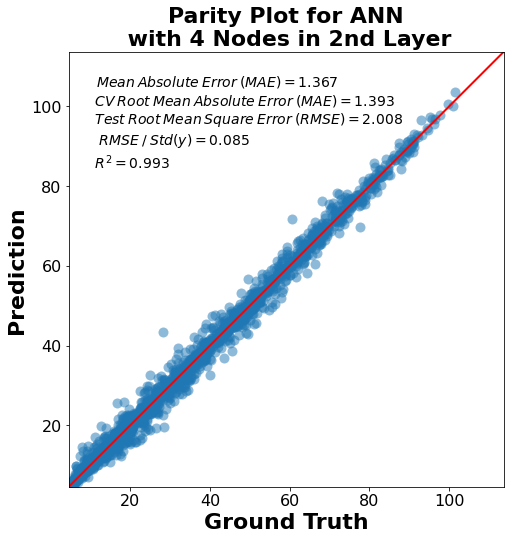

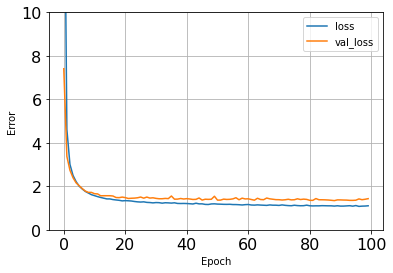

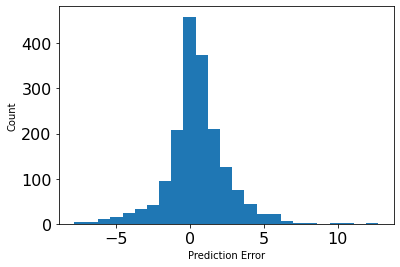

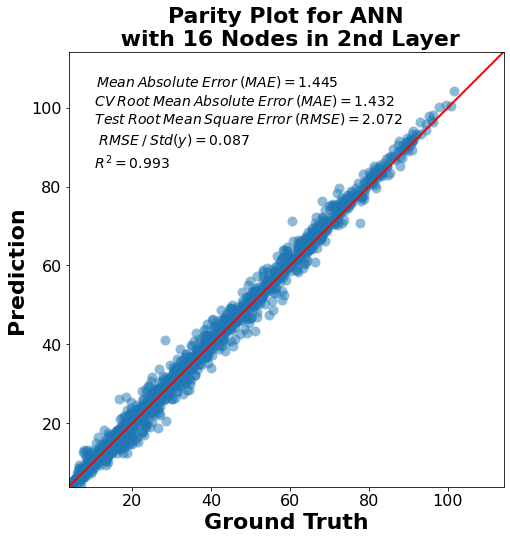

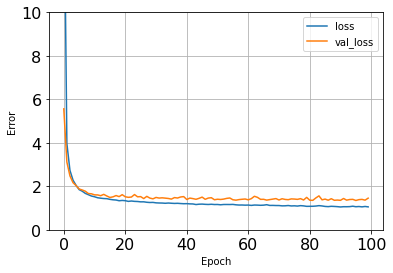

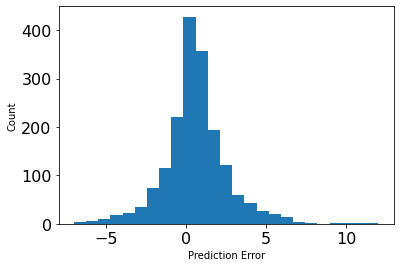

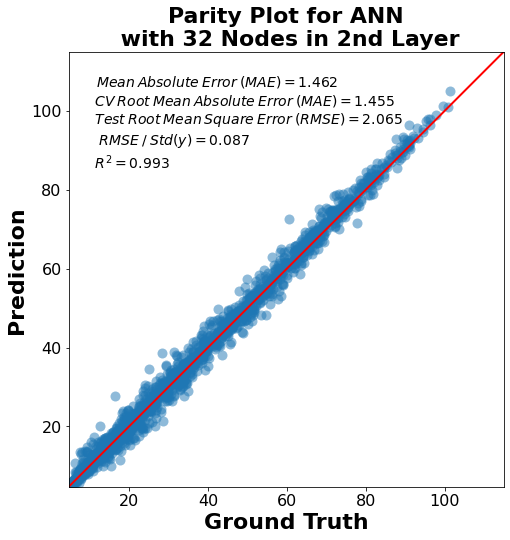

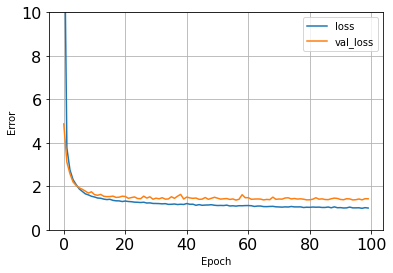

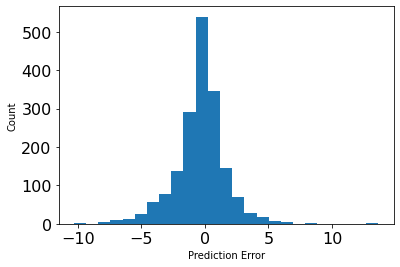

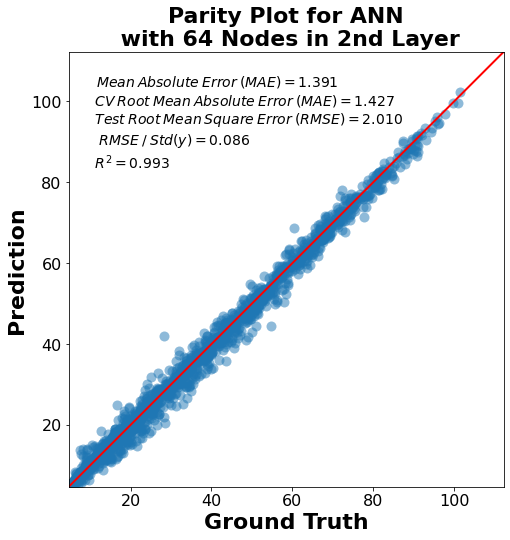

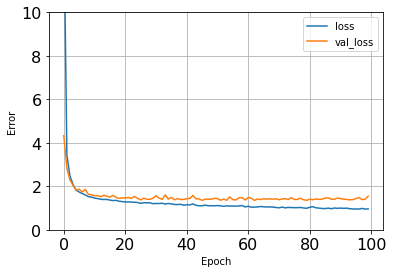

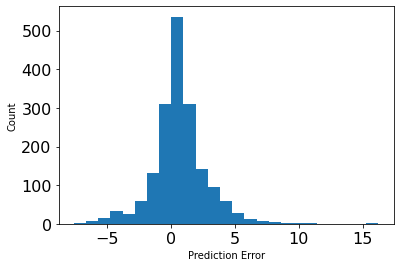

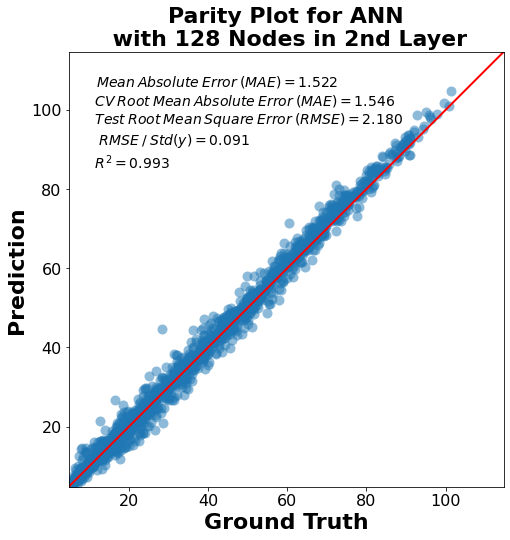

In [ ]:
## Second Layer test

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('stiffness_value')
test_labels = test_features.pop('stiffness_value')


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

input_data = np.array(train_features)

input_data_normalizer = layers.Normalization(input_shape=[1,], axis=None)
input_data_normalizer.adapt(input_data)
test_results = {}


def plot_loss(history):
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)




num_nodes = np.array([4, 16, 32, 64, 128])


for i in num_nodes:

  def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(128, activation='relu'),
        layers.Dense(i, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model



  dnn_model = build_and_compile_model(normalizer)
  dnn_model.summary()


  #time
  history = dnn_model.fit(
      train_features,
      train_labels,
      validation_split=0.2, #5 fold validation
      verbose=0, epochs=100)

  print(history.history)
  plot_loss(history)
  CV_MAE = history.history['val_loss'][-1]

  test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


  pd.DataFrame(test_results, index=['Mean absolute error']).T


  test_predictions = dnn_model.predict(test_features).flatten()



  error = test_predictions - test_labels
  plt.figure()
  plt.hist(error, bins=25)
  plt.xlabel('Prediction Error')
  _ = plt.ylabel('Count')



  MSE_ANN = tf.keras.losses.MeanSquaredError()
  print('MSE_ANN = ', MSE_ANN)







  def partity_plot_ANN(x, y_pred,num_nodes, CV_MAE):
    # Font for figure for publishing
    font_axis_publish = {
            'color':  'black',
            'weight': 'bold',
            'size': 22,
            }
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 16

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    ## find the boundaries of X and Y values
    bounds = (min(x.min(), y_pred.min()) - int(0.1 * y_pred.min()), max(x.max(),y_pred.max())+ int(0.1 * y_pred.max()))

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(x,y_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)

    
    ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 
    mean_abs_err = np.mean(np.abs(x-y_pred))
    rmse = np.sqrt(np.mean((x-y_pred)**2))
    rmse_std = rmse / np.std(y_pred)
    z = np.polyfit(x,y_pred, 1)
    y_hat = np.poly1d(z)(x)

    text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ CV \: Root \: Mean \: Absolute \: Error \: (MAE) = {CV_MAE:0.3f}$ \n $ Test \: Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n  $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y_pred,y_hat):0.3f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
        fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title("Parity Plot for ANN\n with {} Nodes in 2nd Layer".format(num_nodes), fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)


    
  partity_plot_ANN(test_labels, test_predictions, i, CV_MAE)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 16)               33        
 ion)                                                            
                                                                 
 dense_25 (Dense)            (None, 128)               2176      
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,338
Trainable params: 2,305
Non-trainable params: 33
_________________________________________________________________
{'loss': [29.845836639404297, 15.876187324523926, 5.717465877532959, 3.6974151134490967, 3.085132360458374, 2.681764841079712, 2.4021356105804443, 2.2126126289367676, 2.0678043365478516, 1.960140585899353, 1.8538602590560913, 1.777057409286499, 1.7

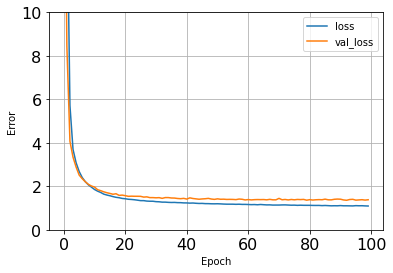

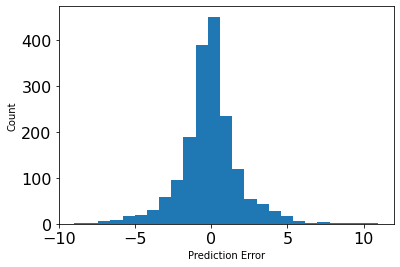

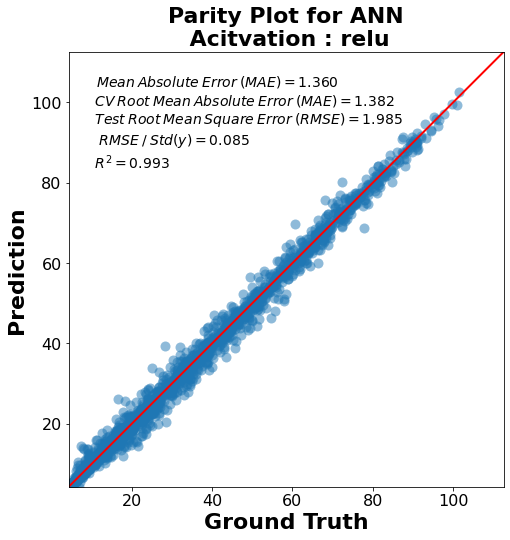

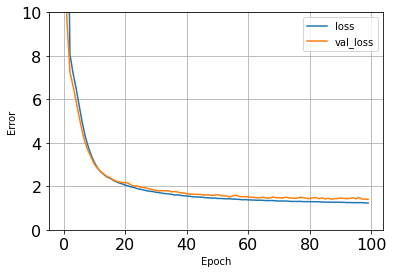

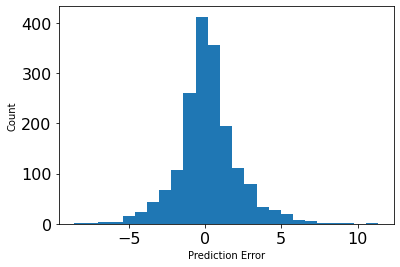

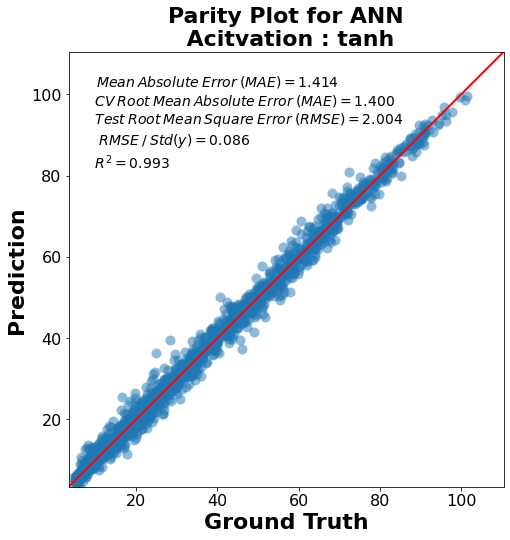

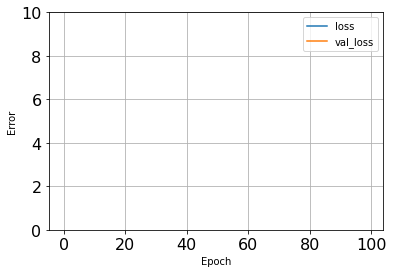

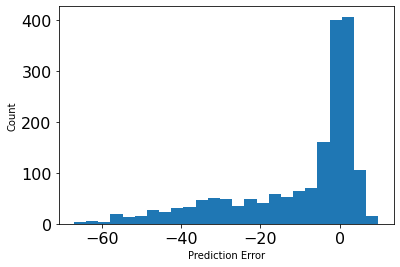

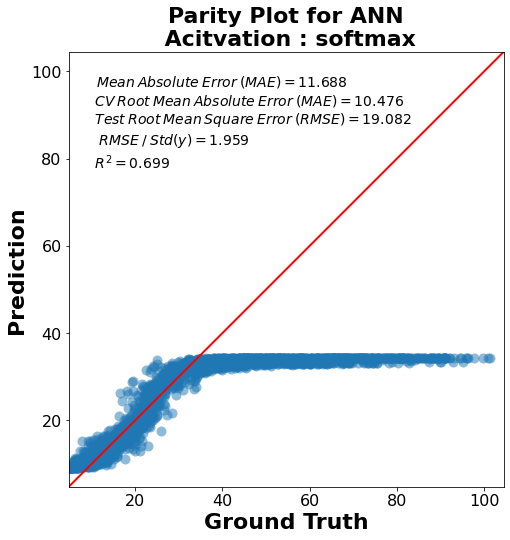

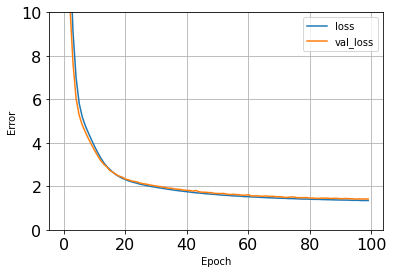

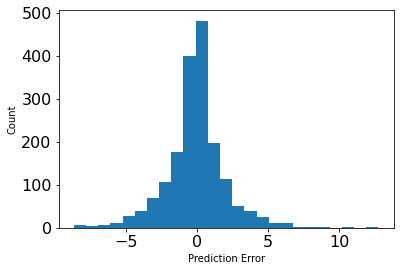

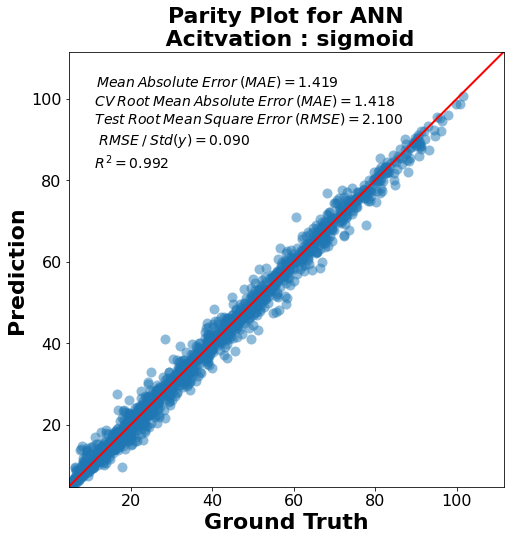

In [ ]:
## Kernel Test

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.activations



train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('stiffness_value')
test_labels = test_features.pop('stiffness_value')


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

input_data = np.array(train_features)

input_data_normalizer = layers.Normalization(input_shape=[1,], axis=None)
input_data_normalizer.adapt(input_data)
test_results = {}


def plot_loss(history):
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)



Activation_Functions = ['relu', 'tanh', 'softmax', 'sigmoid']

for i in Activation_Functions:

  def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(128, activation=i),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model



  dnn_model = build_and_compile_model(normalizer)
  dnn_model.summary()


  #time
  history = dnn_model.fit(
      train_features,
      train_labels,
      validation_split=0.2, #5 fold validation
      verbose=0, epochs=100)

  print(history.history)
  plot_loss(history)
  CV_MAE = history.history['val_loss'][-1]

  test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


  pd.DataFrame(test_results, index=['Mean absolute error']).T


  test_predictions = dnn_model.predict(test_features).flatten()



  error = test_predictions - test_labels
  plt.figure()
  plt.hist(error, bins=25)
  plt.xlabel('Prediction Error')
  _ = plt.ylabel('Count')



  MSE_ANN = tf.keras.losses.MeanSquaredError()
  print('MSE_ANN = ', MSE_ANN)







  def partity_plot_ANN(x, y_pred, activation, CV_MAE):
    # Font for figure for publishing
    font_axis_publish = {
            'color':  'black',
            'weight': 'bold',
            'size': 22,
            }
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 16

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    ## find the boundaries of X and Y values
    bounds = (min(x.min(), y_pred.min()) - int(0.1 * y_pred.min()), max(x.max(),y_pred.max())+ int(0.1 * y_pred.max()))

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(x,y_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)

    
    ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 
    mean_abs_err = np.mean(np.abs(x-y_pred))
    rmse = np.sqrt(np.mean((x-y_pred)**2))
    rmse_std = rmse / np.std(y_pred)
    z = np.polyfit(x,y_pred, 1)
    y_hat = np.poly1d(z)(x)

    text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ CV \: Root \: Mean \: Absolute \: Error \: (MAE) = {CV_MAE:0.3f}$ \n $ Test \: Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n  $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y_pred,y_hat):0.3f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
        fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title("Parity Plot for ANN\n Acitvation : {}".format(activation), fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)


    
  partity_plot_ANN(test_labels, test_predictions, i, CV_MAE)

  

Data Visualization

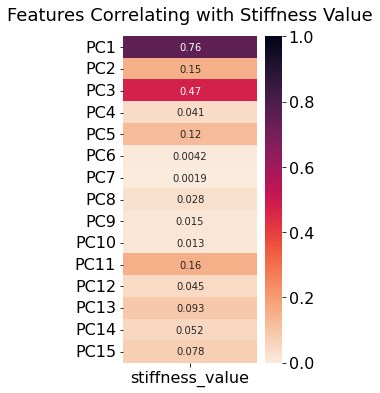

In [ ]:
# Pair-wise heat map
import seaborn as sns

run = 1
if run == 1:
  f, ax = plt.subplots(figsize=(3, 6))
  corr = df.corr()[['stiffness_value']]  #df.iloc[:,15:].corr()
  corr = corr.drop(['Unnamed: 0'])
  corr = corr.drop(['stiffness_value'])
  corr = np.abs(corr)

  heatmap = sns.heatmap(corr, vmin=0, vmax=1, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))
  heatmap.set_title('Features Correlating with Stiffness Value', fontdict={'fontsize':18}, pad=16);

  #heatmap = sns.heatmap(corr.sort_values(by='stiffness_value', ascending=False), vmin=0, vmax=1, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))
  #heatmap.set_title('Features Correlating with Stiffness Value', fontdict={'fontsize':18}, pad=16);



# Pair-wise Scatter Plots
run_scat = 0
if run_scat == 1:
  pp = sns.pairplot(df.iloc[:,1:], height=1.8, aspect=1.8,
                    plot_kws=dict(edgecolor="k", linewidth=0.5),
                    diag_kind="kde", diag_kws=dict(shade=True))

  fig = pp.fig 
  fig.subplots_adjust(top=0.93, wspace=0.3)
  t = fig.suptitle('PC Pairwise Plots', fontsize=14)


In [ ]:
import seaborn as sns
run = 1
if run == 1:
  
  df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
            xlabelsize=8, ylabelsize=8, grid=False)    
  plt.tight_layout(rect=(0, 0, 1.2, 1.2))

  for i in df:
    # Histogram
    fig = plt.figure(figsize = (6,4))
    title = fig.suptitle(str(i), fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax = fig.add_subplot(1,1, 1)
    ax.set_xlabel(str(i))
    ax.set_ylabel("Frequency") 
    ax.text(1.2, 800, r'$\mu$='+str(round(df[i].mean(),2)), 
            fontsize=12)
    freq, bins, patches = ax.hist(df[i], color='steelblue', bins=15,
                                        edgecolor='black', linewidth=1)
                                        

    # Density Plot
    fig = plt.figure(figsize = (6, 4))
    title = fig.suptitle(str(i), fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax1 = fig.add_subplot(1,1, 1)
    ax1.set_xlabel(str(i))
    ax1.set_ylabel("Frequency") 
    sns.kdeplot(df[i], ax=ax1, shade=True, color='steelblue')